In [9]:
import pandas as pd
#import .xlsx file and assign to pandas data frame
df_Nairaland = pd.read_excel(r'C:\Users\DICKSON PC\Nairaland_cleaned.xlsx')
df_Nairaland.head()

,User_Name,Date_Posted,Comment,No_of_Likes,No_of_Shares,Sex
0,ePoster,05-11-2020 16:10:00,Just stating a fact. No one is forced to have ...,27.0,4.0,NaN
1,fati2001,05-11-2020 16:12:00,....,NaN,NaN,m
2,ePoster,05-11-2020 16:17:00,"If a baby endangers a woman's life, healthwise...",13.0,1.0,NaN
3,virginprincess,05-11-2020 16:18:00,Abortion should never ever be legalised in thi...,13.0,NaN,f
4,ePoster,05-11-2020 16:19:00,"virginprincess: As a female, why do you think ...",1.0,NaN,NaN


In [10]:
#inspect data using .info
df_Nairaland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User_Name     412 non-null    object 
 1   Date_Posted   412 non-null    object 
 2   Comment       412 non-null    object 
 3   No_of_Likes   225 non-null    float64
 4   No_of_Shares  23 non-null     float64
 5   Sex           180 non-null    object 
dtypes: float64(2), object(4)
memory usage: 19.4+ KB


In [11]:
df = df_Nairaland.copy()

In [12]:
import re
from nltk import PorterStemmer

In [16]:
#clean comments by removing tags, urls etc, and creating another column to place clean comments
df['Tidy_Comment'] = df['Comment'].str.replace(r"([^0-9A-Za-z \t])|(\w+:\/\/\S+)", ' ')

#delete all words with length less than 3 letters
df['Tidy_Comment'] = df['Tidy_Comment'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#tokenize comments to separate all words
tokenized_comment = df['Tidy_Comment'].apply(lambda x: x.split())

ps = PorterStemmer()
tokenized_comment = tokenized_comment.apply(lambda x: [ps.stem(i) for i in x])

#remove tokenization
for i in range(len(tokenized_comment)):
    tokenized_comment[i] = ' '.join(tokenized_comment[i])

df['Tidy_Comment'] = tokenized_comment
df.head()

C:\Users\DICKSON PC\AppData\Local\Temp\ipykernel_16932\773875865.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tidy_Comment'] = df['Comment'].str.replace(r"([^0-9A-Za-z \t])|(\w+:\/\/\S+)", ' ')


,User_Name,Date_Posted,Comment,No_of_Likes,No_of_Shares,Sex,Tidy_Comment
0,ePoster,05-11-2020 16:10:00,Just stating a fact. No one is forced to have ...,27.0,4.0,NaN,just state fact forc have abort choic therefor...
1,fati2001,05-11-2020 16:12:00,....,NaN,NaN,m,
2,ePoster,05-11-2020 16:17:00,"If a baby endangers a woman's life, healthwise...",13.0,1.0,NaN,babi endang woman life healthwis would inconve...
3,virginprincess,05-11-2020 16:18:00,Abortion should never ever be legalised in thi...,13.0,NaN,f,abort should never ever legalis thi part world...
4,ePoster,05-11-2020 16:19:00,"virginprincess: As a female, why do you think ...",1.0,NaN,NaN,virginprincess femal think that abort shouldn ...


In [18]:
from textblob import TextBlob
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import urllib
import requests
import matplotlib.pyplot as plt 
%matplotlib inline

In [19]:
#compute sentiments of each comment
sentiment_objects = [TextBlob(comment) for comment in df['Tidy_Comment']]
sentiment_values = [[comment.sentiment.polarity, (comment)] for comment in sentiment_objects]

#assign sentiments to dataframe
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "comment"])
df['Polarity'] = sentiment_df['polarity']
df.head()

#describe sentiments in words and put in a new column
sentiment_sign = sentiment_df["polarity"].apply(np.sign).replace({-1: 'Negative', 1: 'Positive', 0: 'zero'})
df["sentiment_sign"]=sentiment_sign
df.head()

,User_Name,Date_Posted,Comment,No_of_Likes,No_of_Shares,Sex,Tidy_Comment,Polarity,sentiment_sign
0,ePoster,05-11-2020 16:10:00,Just stating a fact. No one is forced to have ...,27.0,4.0,NaN,just state fact forc have abort choic therefor...,0.210856,Positive
1,fati2001,05-11-2020 16:12:00,....,NaN,NaN,m,,0.000000,zero
2,ePoster,05-11-2020 16:17:00,"If a baby endangers a woman's life, healthwise...",13.0,1.0,NaN,babi endang woman life healthwis would inconve...,0.100000,Positive
3,virginprincess,05-11-2020 16:18:00,Abortion should never ever be legalised in thi...,13.0,NaN,f,abort should never ever legalis thi part world...,-0.138125,Negative
4,ePoster,05-11-2020 16:19:00,"virginprincess: As a female, why do you think ...",1.0,NaN,NaN,virginprincess femal think that abort shouldn ...,0.200000,Positive


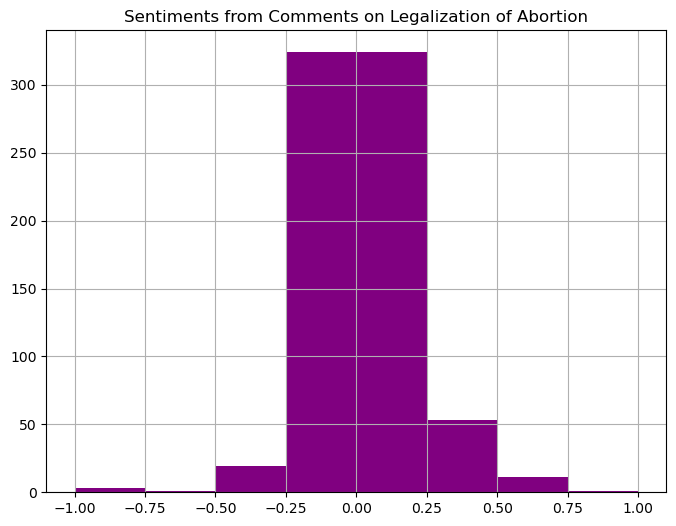

In [23]:
# Plot histogram of the sentiment values
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Comments on Legalization of Abortion")
plt.show()

In [21]:
df.to_excel("Legalization_of_Abortion_nairaland_sentiment.xlsx")